In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

In [78]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data = titanic_data.replace(['female'], 1)
titanic_data = titanic_data.replace(['male'], 0)
titanic_data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<AxesSubplot: >

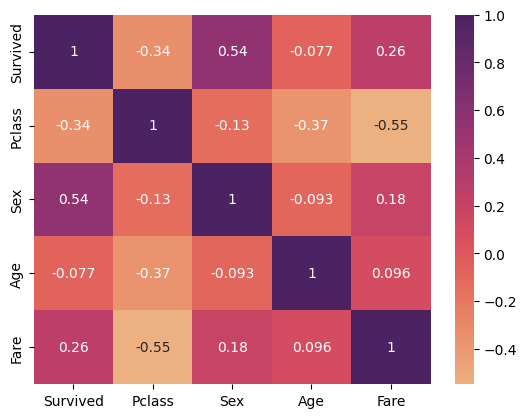

In [5]:
# Step 1: Create a heatmap showing the correlation between the
# following features: survival, pclass, sex, age, and fare 

titanic_features = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
corr_heatmap = sns.heatmap(titanic_features.corr(), annot = True, cmap = 'flare')
corr_heatmap

<AxesSubplot: xlabel='groups', ylabel='count'>

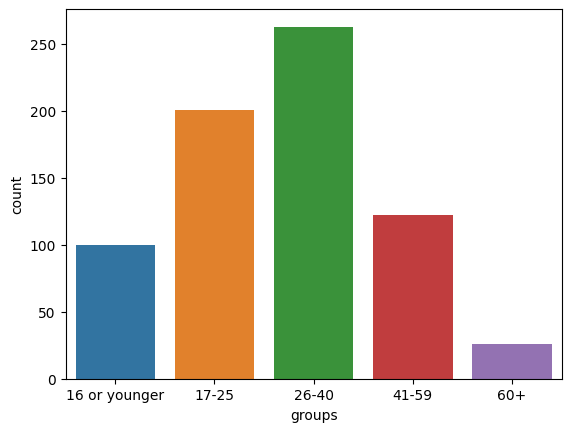

In [29]:
# Step 2: Create a bar graph that illustrates how many passengers
# fell into each of these age ranges: 0 - 16, 17 - 25, 26 -40, 41 - 59, 60 or older

btween_0_16 = len(titanic_data [(titanic_data["Age"] <= 16)])
btween_17_25 = len(titanic_data [(titanic_data["Age"] >= 17) & (titanic_data["Age"] <= 25)])
btween_26_40 = len(titanic_data[(titanic_data["Age"] >= 26) & (titanic_data["Age"] <= 40)])
btween_41_59 = len(titanic_data[(titanic_data["Age"] >= 41) & (titanic_data["Age"] <= 59)])
btween_60_up = len(titanic_data[titanic_data["Age"] >= 60])
ages = ['16 or younger','17-25','26-40', '41-59', '60+']
age_groups = {
    'groups': ages,
    'count':[
        btween_0_16,
        btween_17_25,
        btween_26_40,
        btween_41_59,
        btween_60_up]
}
vis_df = pd.DataFrame(age_groups)
sns.barplot(data = vis_df, x = 'groups', y = 'count', errorbar = None)



In [31]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Find the survival percentage of passengers in group "C"
cherbourg_total = len(titanic_data[titanic_data["Embarked"] == "C"])
cherbourg_survival = len(titanic_data[(titanic_data["Embarked"] == "C") & (titanic_data["Survived"] == 1)])

cherbourg_survival/cherbourg_total*100

#Step 9(b): Find the average age of all male passengers

avg_male_age = titanic_data[titanic_data["Sex"] == "male"].describe().iloc[1]["Age"]
avg_male_age

# example 1
Year = [2012, 2014, 2016, 2020, 2021, 2022, 2018]
Profit = [80, 75.8, 74, 65, 99.5, 19, 33.6]

data_plot = pd.DataFrame({"Year":Year, "Profit":Profit})

sns.lineplot(x = "Year", y = "Profit", data=data_plot)
plt.show()

# example 2

data = pd.read_csv("C:/mtcars.csv")
info = data.iloc[1:20,:5]
sns.lineplot(x = "drat", y = "mpg", data=info, hue="cyl", style="cyl")
plt.show()

<AxesSubplot: xlabel='groups', ylabel='count'>

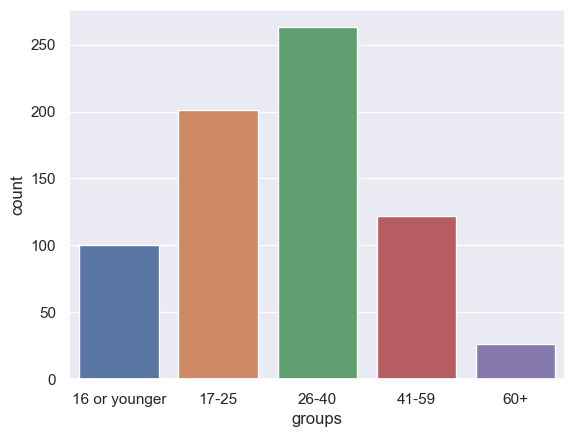

In [96]:
# Step 3: Create a line graph showing the average survival percentage
# of each of the previous age groups

btween_0_16 = len(titanic_data[(titanic_data["Age"] <= 16)])
btween_17_25 = len(titanic_data[(titanic_data["Age"] >= 17) & (titanic_data["Age"] <= 25)])
btween_26_40 = len(titanic_data[(titanic_data["Age"] >= 26) & (titanic_data["Age"] <= 40)])
btween_41_59 = len(titanic_data[(titanic_data["Age"] >= 41) & (titanic_data["Age"] <= 59)])
btween_60_up = len(titanic_data[titanic_data["Age"] >= 60])
ages = ['16 or younger','17-25','26-40', '41-59', '60+']
age_groups = {
    'groups': ages,
    'count':[
        btween_0_16,
        btween_17_25,
        btween_26_40,
        btween_41_59,
        btween_60_up]
}
vis_df = pd.DataFrame(age_groups)
sns.barplot(data = vis_df, x = 'groups', y = 'count', errorbar = None)

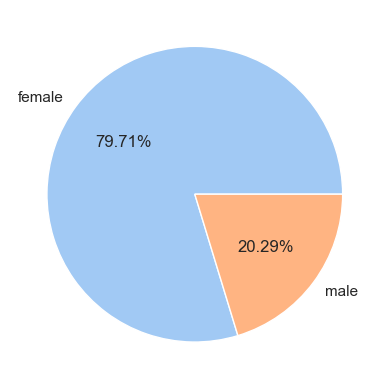

In [114]:
# Step 4: Create a pie chart that shows the percentage
# of survivors that were male and the percentage of survivors that were female
fem_total = len(titanic_data[titanic_data["Sex"] == 1])
fem_survive = len(titanic_data[(titanic_data["Sex"] == 1) & (titanic_data["Survived"] == 1)])
fem_percent = str(fem_survive/fem_total*100)
male_total = len(titanic_data[titanic_data["Sex"] == 0])
male_survive = len(titanic_data[(titanic_data["Sex"] == 0) & (titanic_data["Survived"] == 1)])
male_percent = str(male_survive/male_total*100)
percents = [
    fem_percent,
    male_percent
]
labels_gender = [
    "female",
    "male"
]
colors = sns.color_palette('pastel')[0:5]
plt.pie(labels = labels_gender, x = percents, colors = colors, autopct="%.2f%%")
plt.show()

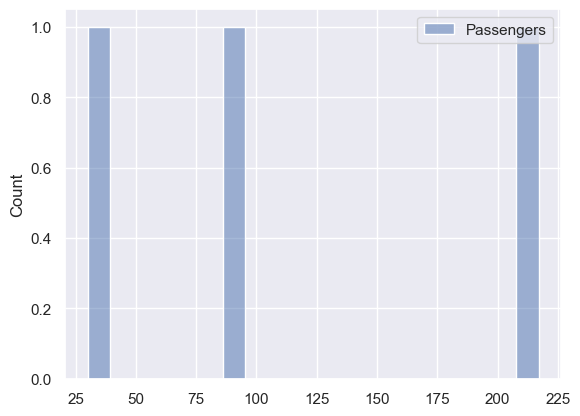

In [76]:
# Step 5: Create a histogram that shows the distribution
# of passengers between the three embarking locations: 
# C (Cherbourg), Q (Queenstown), S (Southampton)

cherbourg_survival = len(titanic_data[(titanic_data["Embarked"] == "C") & (titanic_data["Survived"] == 1)])
queenstown_survival = len(titanic_data[(titanic_data["Embarked"] == "Q") & (titanic_data["Survived"] == 1)])
south_survival_survival = len(titanic_data[(titanic_data["Embarked"] == "S") & (titanic_data["Survived"] == 1)])

description = {
    'Passengers':[
        cherbourg_survival,
        queenstown_survival,
        south_survival_survival]
    }

datf = pd.DataFrame(description)

sns.histplot(data = datf, kde=False, bins=20)
plt.show()